In [ ]:
import os, csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
boston_df = pd.read_csv('/content/drive/MyDrive/NEU IE 7275 Colab Notebooks/BostonHousing.csv')

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296,15.30000,4.98000,24.00000,0
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242,17.80000,9.14000,21.60000,0
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242,17.80000,4.03000,34.70000,1
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222,18.70000,2.94000,33.40000,1
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222,18.70000,5.33000,36.20000,1


In [ ]:
boston_df.shape

(506, 14)

In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,3.61352,11.36364,11.13678,0.06917,0.55470,6.28463,68.57490,3.79504,9.54941,408.23715,18.45553,12.65306,22.53281,0.16601
std,8.60155,23.32245,6.86035,0.25399,0.11588,0.70262,28.14886,2.10571,8.70726,168.53712,2.16495,7.14106,9.19710,0.37246
min,0.00632,0.00000,0.46000,0.00000,0.38500,3.56100,2.90000,1.12960,1.00000,187.00000,12.60000,1.73000,5.00000,0.00000
25%,0.08204,0.00000,5.19000,0.00000,0.44900,5.88550,45.02500,2.10018,4.00000,279.00000,17.40000,6.95000,17.02500,0.00000
50%,0.25651,0.00000,9.69000,0.00000,0.53800,6.20850,77.50000,3.20745,5.00000,330.00000,19.05000,11.36000,21.20000,0.00000
75%,3.67708,12.50000,18.10000,0.00000,0.62400,6.62350,94.07500,5.18843,24.00000,666.00000,20.20000,16.95500,25.00000,0.00000
max,88.97620,100.00000,27.74000,1.00000,0.87100,8.78000,100.00000,12.12650,24.00000,711.00000,22.00000,37.97000,50.00000,1.00000


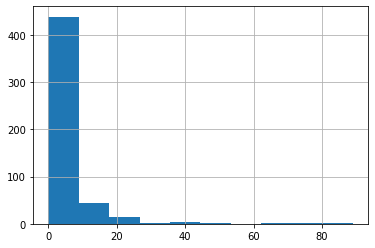

In [ ]:
boston_df.CRIM.hist()

In [ ]:
boston_df.ZN.value_counts()

0.00000      372
20.00000      21
80.00000      15
22.00000      10
12.50000      10
25.00000      10
40.00000       7
45.00000       6
30.00000       6
90.00000       5
95.00000       4
60.00000       4
21.00000       4
33.00000       4
55.00000       3
70.00000       3
34.00000       3
52.50000       3
35.00000       3
28.00000       3
75.00000       3
82.50000       2
85.00000       2
17.50000       1
100.00000      1
18.00000       1
Name: ZN, dtype: int64

In [ ]:
boston_df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [ ]:
boston_df.corr().style.highlight_max()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,RM_BIN
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987,-0.220737
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296,0.271870
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276,-0.357415
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631,0.068701
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502,-0.261580
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265,0.921914
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196,-0.201550
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887,0.184265
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924,-0.188128
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687,-0.258530


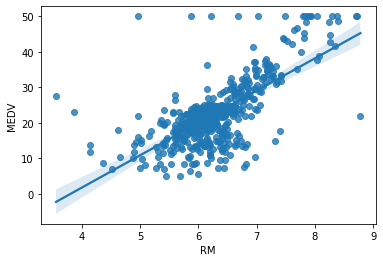

In [ ]:
#sn.scatterplot(x='RM',y='MEDV',data=boston_df);
sn.regplot(x='RM',y='MEDV',data=boston_df);

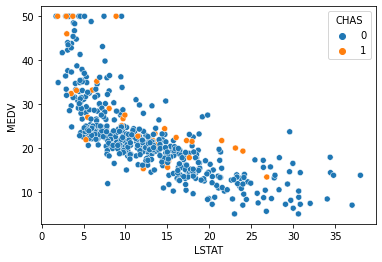

In [ ]:
sn.scatterplot(x='LSTAT',y='MEDV',data=boston_df,hue='CHAS');

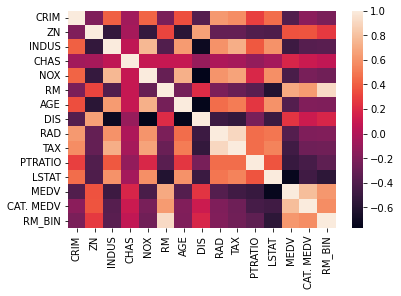

In [ ]:
sn.heatmap(boston_df.corr().round(2));

In [ ]:
boston_df.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
boston_df.groupby(['CHAS'])['MEDV'].mean()

CHAS
0   22.09384
1   28.44000
Name: MEDV, dtype: float64

In [ ]:
boston_df.groupby(['CHAS'])['MEDV'].median()

CHAS
0   20.90000
1   23.30000
Name: MEDV, dtype: float64

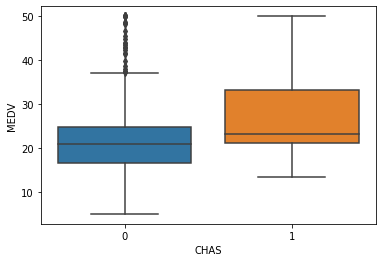

In [ ]:
sn.boxplot(x='CHAS',y='MEDV',data=boston_df);

In [ ]:
boston_df['RM_BIN'] = pd.cut(boston_df.RM,range(0,10),labels=False)
boston_df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,RM_BIN
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296,15.30000,4.98000,24.00000,0,6
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242,17.80000,9.14000,21.60000,0,6
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242,17.80000,4.03000,34.70000,1,7
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222,18.70000,2.94000,33.40000,1,6
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222,18.70000,5.33000,36.20000,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00000,11.93000,0,0.57300,6.59300,69.10000,2.47860,1,273,21.00000,9.67000,22.40000,0,6
502,0.04527,0.00000,11.93000,0,0.57300,6.12000,76.70000,2.28750,1,273,21.00000,9.08000,20.60000,0,6
503,0.06076,0.00000,11.93000,0,0.57300,6.97600,91.00000,2.16750,1,273,21.00000,5.64000,23.90000,0,6
504,0.10959,0.00000,11.93000,0,0.57300,6.79400,89.30000,2.38890,1,273,21.00000,6.48000,22.00000,0,6


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

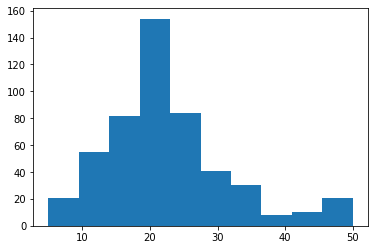

In [ ]:

plt.hist(boston_df['MEDV'])

In [ ]:

boston_df.groupby(['CHAS','RM_BIN'])['MEDV'].mean()

CHAS  RM_BIN
0     3        25.30000
      4        15.40714
      5        17.20000
      6        21.76917
      7        35.96444
      8        45.70000
1     5        22.21818
      6        25.91875
      7        44.06667
      8        35.95000
Name: MEDV, dtype: float64

In [ ]:
boston_df.pivot_table(values='MEDV',index='RM_BIN',columns='CHAS',aggfunc=np.mean,margins=True)

CHAS,0,1,All
RM_BIN,,,
3,25.30000,NaN,25.30000
4,15.40714,NaN,15.40714
5,17.20000,22.21818,17.55159
6,21.76917,25.91875,22.01599
7,35.96444,44.06667,36.91765
8,45.70000,35.95000,44.20000
All,22.09384,28.44000,22.53281


In [ ]:
boston_df['ZN'].value_counts()

0.00000      372
20.00000      21
80.00000      15
22.00000      10
12.50000      10
25.00000      10
40.00000       7
45.00000       6
30.00000       6
90.00000       5
95.00000       4
60.00000       4
21.00000       4
33.00000       4
55.00000       3
70.00000       3
34.00000       3
52.50000       3
35.00000       3
28.00000       3
75.00000       3
82.50000       2
85.00000       2
17.50000       1
100.00000      1
18.00000       1
Name: ZN, dtype: int64

In [ ]:
tb = pd.crosstab(boston_df['CAT. MEDV'],boston_df['ZN']) # frequency table
prop_tb = tb/tb.sum()
prop_tb.round(2)

ZN,0.00000,12.50000,17.50000,18.00000,20.00000,21.00000,22.00000,25.00000,28.00000,30.00000,...,55.00000,60.00000,70.00000,75.00000,80.00000,82.50000,85.00000,90.00000,95.00000,100.00000
CAT. MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91000,1.00000,0.00000,1.00000,0.24000,1.00000,0.90000,1.00000,1.00000,1.00000,...,0.67000,0.75000,1.00000,0.33000,0.67000,0.50000,1.00000,0.00000,0.00000,0.00000
1,0.09000,0.00000,1.00000,0.00000,0.76000,0.00000,0.10000,0.00000,0.00000,0.00000,...,0.33000,0.25000,0.00000,0.67000,0.33000,0.50000,0.00000,1.00000,1.00000,1.00000


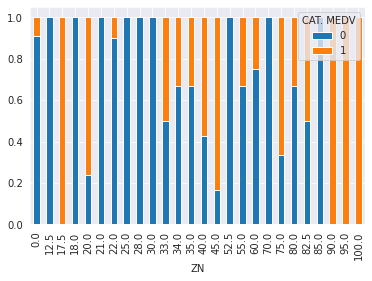

In [ ]:
ax = prop_tb.transpose().plot(kind='bar',stacked=True)

In [ ]:
boston_df['RM_BIN'].value_counts()

6    269
5    157
7     51
4     14
8     13
3      2
Name: RM_BIN, dtype: int64

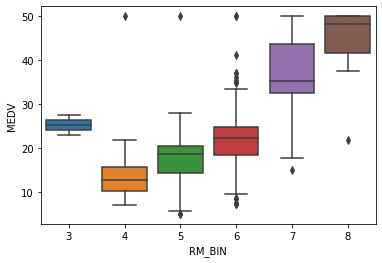

In [ ]:
sn.boxplot(x='RM_BIN',y='MEDV',data=boston_df);

In [ ]:
boston_df.loc[boston_df['RM_BIN'] <= 3,'RM_CNT']= 'L'
boston_df.loc[(boston_df['RM_BIN'] > 4) & (boston_df['RM_BIN'] <=6),'RM_CNT']= 'M'
boston_df.loc[boston_df['RM_BIN'] > 6,'RM_CNT']= 'H'

In [ ]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,RM_BIN,RM_CNT
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296,15.30000,4.98000,24.00000,0,6,M
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242,17.80000,9.14000,21.60000,0,6,M
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242,17.80000,4.03000,34.70000,1,7,H
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222,18.70000,2.94000,33.40000,1,6,M
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222,18.70000,5.33000,36.20000,1,7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00000,11.93000,0,0.57300,6.59300,69.10000,2.47860,1,273,21.00000,9.67000,22.40000,0,6,M
502,0.04527,0.00000,11.93000,0,0.57300,6.12000,76.70000,2.28750,1,273,21.00000,9.08000,20.60000,0,6,M
503,0.06076,0.00000,11.93000,0,0.57300,6.97600,91.00000,2.16750,1,273,21.00000,5.64000,23.90000,0,6,M
504,0.10959,0.00000,11.93000,0,0.57300,6.79400,89.30000,2.38890,1,273,21.00000,6.48000,22.00000,0,6,M


In [ ]:
pd.concat([boston_df,pd.get_dummies(boston_df['RM_CNT'])],axis=1).drop(['RM_BIN','RM_CNT','M'],axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV,H,L
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296,15.30000,4.98000,24.00000,0,0,0
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242,17.80000,9.14000,21.60000,0,0,0
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242,17.80000,4.03000,34.70000,1,1,0
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222,18.70000,2.94000,33.40000,1,0,0
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222,18.70000,5.33000,36.20000,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00000,11.93000,0,0.57300,6.59300,69.10000,2.47860,1,273,21.00000,9.67000,22.40000,0,0,0
502,0.04527,0.00000,11.93000,0,0.57300,6.12000,76.70000,2.28750,1,273,21.00000,9.08000,20.60000,0,0,0
503,0.06076,0.00000,11.93000,0,0.57300,6.97600,91.00000,2.16750,1,273,21.00000,5.64000,23.90000,0,0,0
504,0.10959,0.00000,11.93000,0,0.57300,6.79400,89.30000,2.38890,1,273,21.00000,6.48000,22.00000,0,0,0


**Let's apply the PCA method to cereals data**

In [ ]:
cereals_df = pd.read_csv('/content/drive/MyDrive/NEU IE 7275 Colab Notebooks/Cereals.csv')
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.00000,5.00000,6.00000,280.00000,25,3,1.00000,0.33000,68.40297
1,100%_Natural_Bran,Q,C,120,3,5,15,2.00000,8.00000,8.00000,135.00000,0,3,1.00000,1.00000,33.98368
2,All-Bran,K,C,70,4,1,260,9.00000,7.00000,5.00000,320.00000,25,3,1.00000,0.33000,59.42551
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.00000,8.00000,0.00000,330.00000,25,3,1.00000,0.50000,93.70491
4,Almond_Delight,R,C,110,2,2,200,1.00000,14.00000,8.00000,NaN,25,3,1.00000,0.75000,34.38484


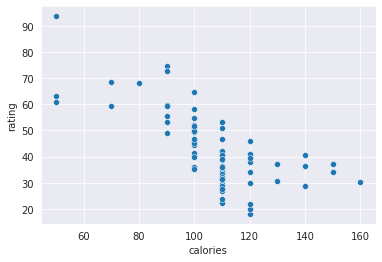

In [ ]:
sn.scatterplot(x='calories',y='rating',data=cereals_df);

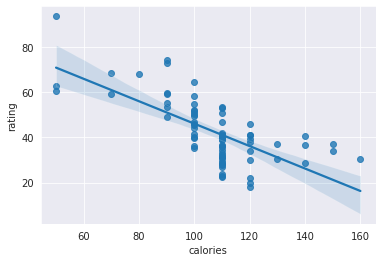

In [ ]:
sn.regplot(x='calories',y='rating',data=cereals_df);

In [ ]:
cereals_df_short = cereals_df[['calories','rating']]
np.corrcoef(cereals_df_short.calories,cereals_df_short.rating)[0,1].round(2)

-0.69

In [ ]:
cereals_df_short.describe()

,calories,rating
count,77.00000,77.00000
mean,106.88312,42.66570
std,19.48412,14.04729
min,50.00000,18.04285
25%,100.00000,33.17409
50%,110.00000,40.40021
75%,110.00000,50.82839
max,160.00000,93.70491


In [ ]:
np.var(cereals_df_short.calories)+np.var(cereals_df_short.rating)

569.4642656069894

In [ ]:
np.cov(cereals_df_short.calories,cereals_df_short.rating).round(2)

array([[ 379.63, -188.68],
       [-188.68,  197.33]])

In [ ]:
pcs = PCA(n_components=2)
pcs.fit(cereals_df_short)

PCA(n_components=2)

In [ ]:
pcsSummary = pd.DataFrame({'Stdev':np.sqrt(pcs.explained_variance_),
                           'Prop_var_exp':pcs.explained_variance_ratio_,
                           'cum_prop':np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary =  pcsSummary.transpose()
pcsSummary.columns = ['PC1','PC2']
pcsSummary.round(4)

,PC1,PC2
Stdev,22.31650,8.88440
Prop_var_exp,0.86320,0.13680
cum_prop,0.86320,1.00000


In [ ]:
pcsSummary.PC1[0]**2 +pcsSummary.PC2[0]**2

576.9572164702392

In [ ]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns = ['PC1','PC2'],
                                index = ['calories','rating']
                                )
pcsComponents_df

,PC1,PC2
calories,-0.84705,0.53151
rating,0.53151,0.84705


In [ ]:
scores = pd.DataFrame(pcs.transform(cereals_df_short),columns = ['PC1','PC2'])
scores

,PC1,PC2
0,44.92153,2.19718
1,-15.72526,-0.38242
2,40.14993,-5.40721
3,75.31077,12.99913
4,-7.04151,-5.35769
...,...,...
72,-4.53208,-1.35847
73,-10.56622,-10.97496
74,9.61563,2.37407
75,10.57486,3.90278


In [ ]:
scores.corr()

,PC1,PC2
PC1,1.00000,-0.00000
PC2,-0.00000,1.00000


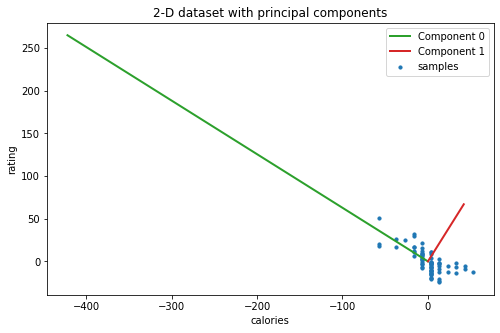

In [ ]:
plt.figure(figsize=(8,8))

pca_x = (cereals_df['calories'] - np.mean(cereals_df['calories']) )
#/np.std(cereals_df['calories'])
pca_y = (cereals_df['rating'] - np.mean(cereals_df['rating']) )
#/np.std(cereals_df['rating'])

plt.scatter(x=pca_x, y=pca_y,s=10, label="samples")
for i, (comp, var, std) in enumerate(zip(pcs.components_, pcs.explained_variance_ , np.sqrt(pcs.explained_variance_))):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=2,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-D dataset with principal components",
    xlabel="calories",
    ylabel="rating",
)
plt.legend()
plt.show()

**Now let's apply the PCA method to Boston data**

In [ ]:
boston_df = pd.read_csv('/content/drive/MyDrive/NEU IE 7275 Colab Notebooks/BostonHousing.csv')

In [ ]:
boston_df = boston_df.drop(['CHAS','MEDV','CAT. MEDV'],axis=1)
boston_df.head(5)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.00000,2.31000,0.53800,6.57500,65.20000,4.09000,1,296,15.30000,4.98000
1,0.02731,0.00000,7.07000,0.46900,6.42100,78.90000,4.96710,2,242,17.80000,9.14000
2,0.02729,0.00000,7.07000,0.46900,7.18500,61.10000,4.96710,2,242,17.80000,4.03000
3,0.03237,0.00000,2.18000,0.45800,6.99800,45.80000,6.06220,3,222,18.70000,2.94000
4,0.06905,0.00000,2.18000,0.45800,7.14700,54.20000,6.06220,3,222,18.70000,5.33000


In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,3.61352,11.36364,11.13678,0.55470,6.28463,68.57490,3.79504,9.54941,408.23715,18.45553,12.65306
std,8.60155,23.32245,6.86035,0.11588,0.70262,28.14886,2.10571,8.70726,168.53712,2.16495,7.14106
min,0.00632,0.00000,0.46000,0.38500,3.56100,2.90000,1.12960,1.00000,187.00000,12.60000,1.73000
25%,0.08204,0.00000,5.19000,0.44900,5.88550,45.02500,2.10018,4.00000,279.00000,17.40000,6.95000
50%,0.25651,0.00000,9.69000,0.53800,6.20850,77.50000,3.20745,5.00000,330.00000,19.05000,11.36000
75%,3.67708,12.50000,18.10000,0.62400,6.62350,94.07500,5.18843,24.00000,666.00000,20.20000,16.95500
max,88.97620,100.00000,27.74000,0.87100,8.78000,100.00000,12.12650,24.00000,711.00000,22.00000,37.97000


In [ ]:
boston_df.shape

(506, 11)

We are going to apply PCA on boston data. For a good description of PCA using python see this: #https://ostwalprasad.github.io/machine-learning/PCA-using-python.html


PCA is largely affected by scales and different features might have different scales. So it is better to standardize data before finding PCA components. 

In [ ]:
boston_df_std = StandardScaler().fit_transform(boston_df)
boston_df_std 

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -0.66660821,
        -1.45900038, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.66905833]])

In [ ]:
boston_df_pca = pd.DataFrame(boston_df_std, columns= boston_df.columns)
boston_df_pca.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000
std,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099
min,-0.41978,-0.48772,-1.55784,-1.46588,-3.88025,-2.33544,-1.26707,-0.98284,-1.31399,-2.70738,-1.53113
25%,-0.41097,-0.48772,-0.86769,-0.91303,-0.56863,-0.83745,-0.80569,-0.63796,-0.76758,-0.48804,-0.79942
50%,-0.39067,-0.48772,-0.21110,-0.14422,-0.10847,0.31738,-0.27932,-0.52300,-0.46467,0.27486,-0.18125
75%,0.00740,0.04877,1.01600,0.59868,0.48277,0.90680,0.66237,1.66125,1.53093,0.80658,0.60302
max,9.93393,3.80423,2.42257,2.73235,3.55504,1.11749,3.96052,1.66125,1.79819,1.63883,3.54877


In [ ]:
n_comp = 11

pca_model = PCA(n_components=n_comp)

pca = pca_model.fit_transform(boston_df_pca)
pca.shape

(506, 11)

In [ ]:
pca

array([[-2.04762771e+00, -1.00663690e+00,  6.21204294e-01, ...,
        -8.87738627e-03,  3.54223003e-02,  3.84298013e-01],
       [-1.38545044e+00, -8.59014979e-01, -4.68606674e-01, ...,
        -6.37809208e-01, -1.08674375e-01, -5.88288291e-02],
       [-2.02989093e+00, -8.05042044e-01,  4.65355548e-01, ...,
        -4.81342415e-01,  1.41685550e-01,  1.33388178e-03],
       ...,
       [-2.11219190e-01, -1.34000322e+00,  1.35393332e-01, ...,
         1.50603804e-01,  3.04437489e-01,  7.99481014e-02],
       [-1.76010281e-01, -1.24275702e+00, -1.01915630e-01, ...,
         1.22353693e-01,  3.26273650e-01,  7.03639429e-02],
       [-1.78353860e-02, -9.87407992e-01, -9.51725829e-01, ...,
         2.22197686e-01,  2.62654422e-01,  3.14627380e-02]])

In [ ]:
print(np.round(pca_model.explained_variance_ratio_,2))

[0.54 0.12 0.1  0.07 0.05 0.04 0.03 0.02 0.02 0.02 0.01]


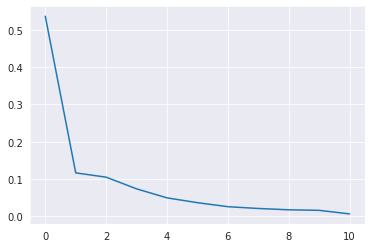

In [ ]:
plt.plot(pca_model.explained_variance_ratio_);

In [ ]:
np.cumsum(np.round(pca_model.explained_variance_ratio_,2))

array([0.54, 0.66, 0.76, 0.83, 0.88, 0.92, 0.95, 0.97, 0.99, 1.01, 1.02])

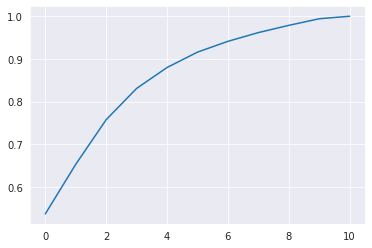

In [ ]:
plt.plot(np.cumsum(pca_model.explained_variance_ratio_));

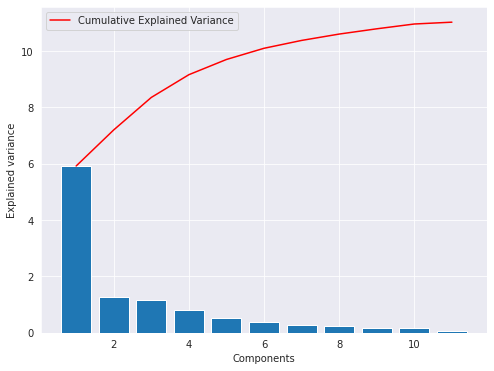

In [ ]:
plt.figure(figsize=(8,6))
sn.set_style('darkgrid')
plt.bar(range(1,len(pca_model.explained_variance_ )+1),pca_model.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_model.explained_variance_ )+1),
         np.cumsum(pca_model.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left');

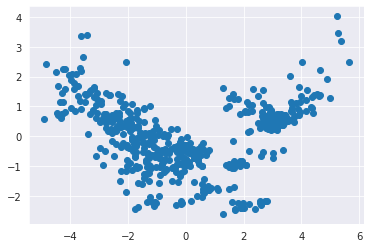

In [ ]:
#various pcs should seem uncorrelated
plt.scatter(pca[:, 0], pca[:, 1]);

In [ ]:
pca_model.n_components

11

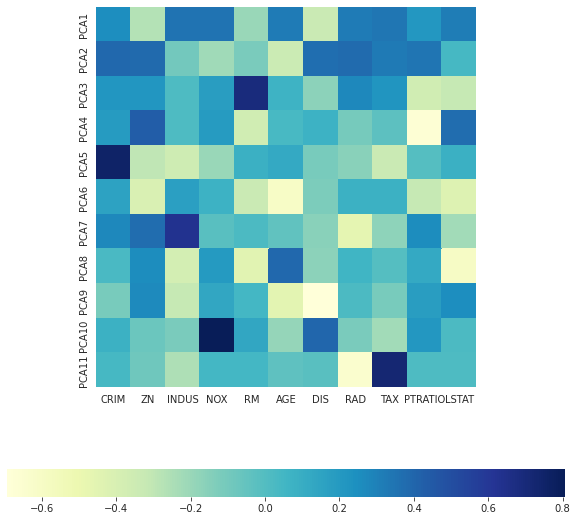

In [ ]:
#Effect of variables on each components
plt.figure(figsize=[10,10])
ax = sn.heatmap(pca_model.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca_model.n_components_+1)],
                 xticklabels=list(boston_df_pca.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

In [ ]:
pca_model.components_[0:2, :]

array([[ 0.25140813, -0.26633089,  0.35480986,  0.3498336 , -0.19660662,
         0.32306444, -0.33074809,  0.32229905,  0.34234058,  0.2111561 ,
         0.31544965],
       [ 0.39232273,  0.38952558, -0.09197865, -0.21600162, -0.11671572,
        -0.33686712,  0.3714431 ,  0.38001604,  0.32730166,  0.34727838,
         0.04497873]])